Power_divergenceResult(statistic=np.float64(584.9831522576836), pvalue=np.float64(6.228314248173183e-22))


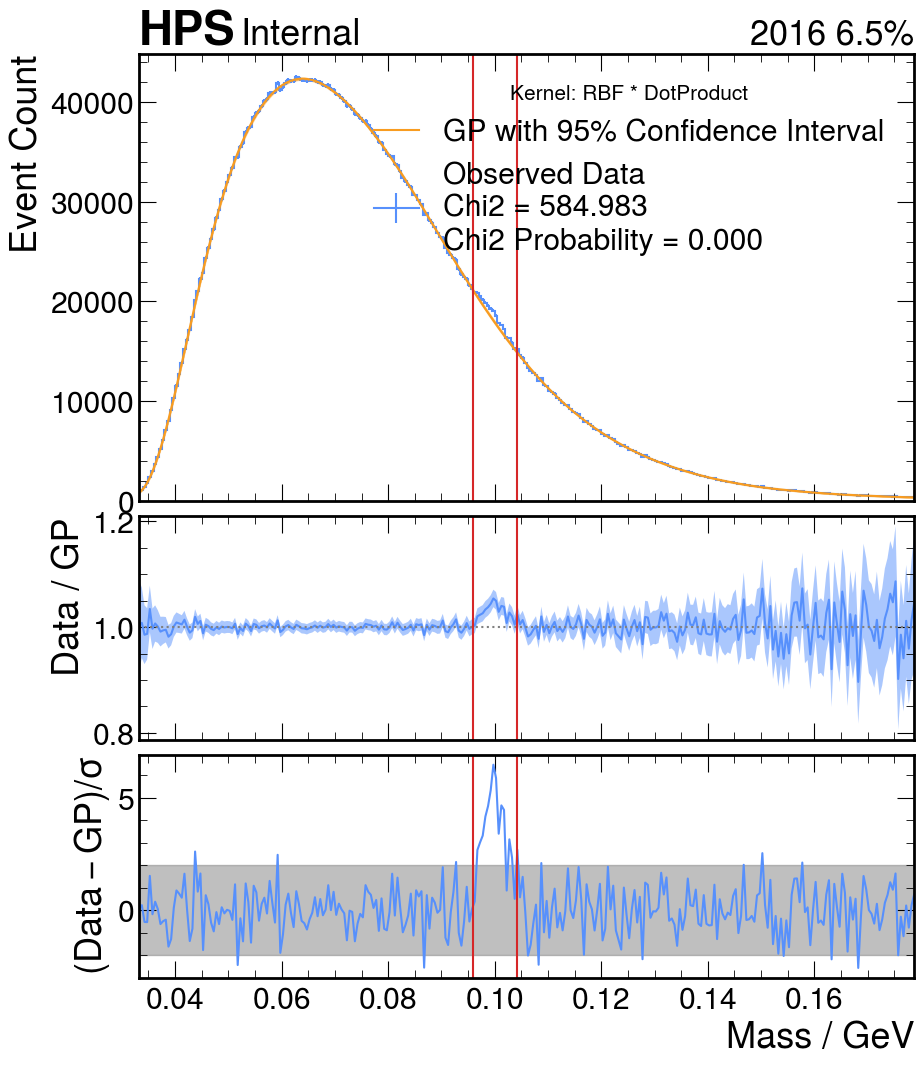

In [1]:
%load_ext autoreload
%autoreload 2
    
from gp import GaussianProcessModel, kernels, rebin_and_limit, _deduce_histogram, inject_signal
import pickle
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import openpyxl
import math
# Making table for testing masses. Currently gives lots of inf values for unknown reason.
mass_hypothesis = .1
mass_hypotheses = np.linspace(.033,.179,73).tolist()
# Coefficients for the polynomial from the table for unsmeared (P0 to P4)
coefficients = [0.00032, 0.019, -0.11, 1.39, -4.33]

def sig_width(mass, coeffs):
    #sigma is twice the mass resolution
    return sum(c * mass**i for i, c in enumerate(coeffs))

m = GaussianProcessModel(
    h = 'real', # use real IMD from ROOT file in this directory
    kernel = kernels.Product(kernels.RBF(), kernels.DotProduct()),
    blind_range = (mass_hypothesis-2*sig_width(mass_hypothesis, coefficients), mass_hypothesis+2*sig_width(mass_hypothesis, coefficients)),
    modify_histogram = [rebin_and_limit(10, 0.033, 0.179), inject_signal(5.0,sig_width(mass_hypothesis,coefficients),mass_hypothesis)]
)
m.model
m.model.kernel_
fig, ax = m.plot()
#pp = m.plot_pull_histogram()
#m.plot_raw()
plt.show()
